# Problem Statement
Counterfeit currency is a persistent challenge for financial institutions and vendors, leading to economic losses and eroding trust. Using the Fake Bills dataset, the goal of this project is to build a machine learning model that can accurately distinguish between genuine bills and fake ones based on their features. The model should be robust, reliable, and efficient in detecting counterfeit bills in operational conditions to help reduce fraud.

# Import Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [2]:
data = pd.read_csv("fake_bills.csv", sep=';')
data

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


# Domain Analysis
* This dataset belongs to the finance and security domain.
* Target Variable-
  - is_genuine → Boolean (True = genuine bill, False = fake bill)
* Features (Physical Measurements of Bills)-
  - diagonal → Diagonal length of the bill.
  - height_left → Height of the bill measured on the left side.
  - height_right → Height measured on the right side.
  - margin_low → Lower margin size.
  - margin_up → Upper margin size.
  - length → Total length of the bill.
* This dataset provides physical measurements of banknotes to classify them as genuine or counterfeit. 
* By analyzing geometric features like diagonal, height, margins, and length, one can build a machine learning model for counterfeit detection.

# Basic Checks

In [3]:
# 1) print first 5 rows
data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [4]:
# 2) print last 5 rows
data.tail()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25
1499,False,171.47,104.15,103.82,4.63,3.37,112.07


In [5]:
# 3) shape
data.shape

(1500, 7)

In [6]:
# 4) print all the columns
data.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

In [7]:
# 5) Check datatypes of each column
data.dtypes

is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

In [8]:
# 6) Check memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [9]:
# 7) find unique values in the target
data.is_genuine.unique()

array([ True, False])

In [10]:
# 8) find count of True and False values
data.is_genuine.value_counts()

is_genuine
True     1000
False     500
Name: count, dtype: int64

In [11]:
# 9) statistical analysis
data.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


Insights:-
* Real bills are produced with machines, so measurements like diagonal, left height, and right height hardly change (very tiny standard deviation). 
* This makes them almost “clones” of each other.
* The bottom margin (margin_low) and length vary a lot compared to other features.
* Fakes are not cut or printed with the same precision, so they come out a little too long, too short, or with uneven margins.
* Margin_low has the biggest spread (some bills go as low as 2.98 and as high as 6.9).
* Length also ranges widely (109.49 to 114.44).
* These are likely the best “clues” to spot a counterfeit.
* The margin_low column is missing 37 values, so before modeling, we’ll need to fix (impute) or drop those rows.

In [12]:
# 10) Check for missing values
data.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

# Exploratory Data Analysis
 ### a) Univariate Analysis- 

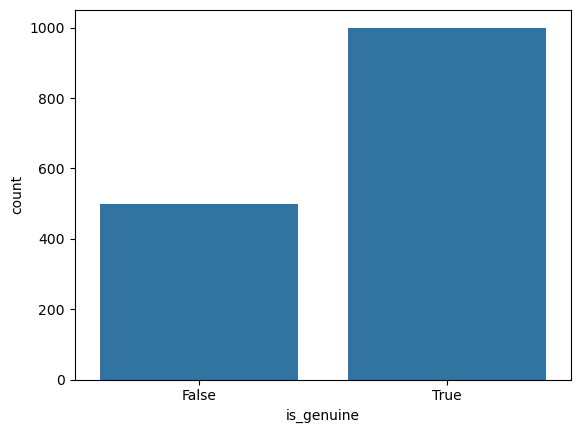

In [13]:
# 1) check whether data is balanced or not
sns.countplot(x=data.is_genuine)
plt.show()

Clearly the data is imbalanced since we have more records related to True bills and less records related to fake bills.

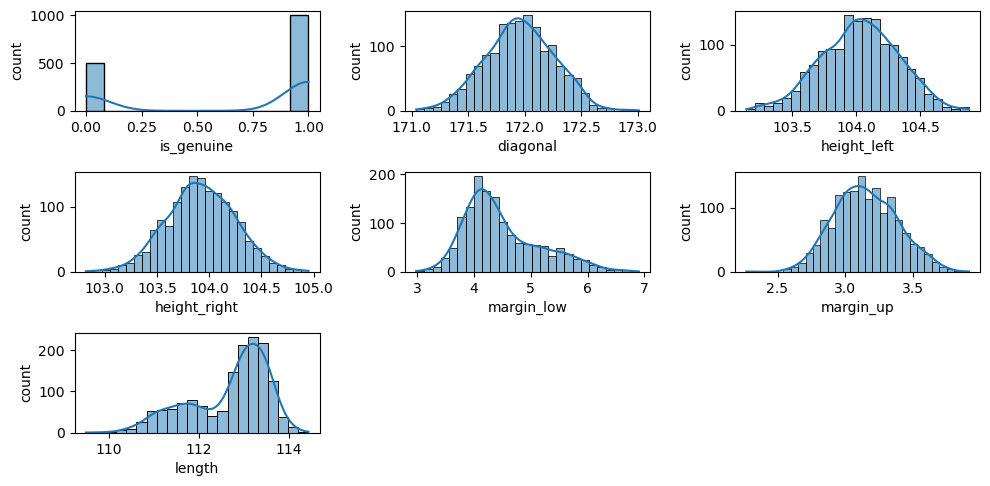

In [14]:
# Check for distribution of data

plt.figure(figsize=(10,5), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber <= 7:
        ax = plt.subplot(3,3, plotnumber)
        sns.histplot(x=data[column], kde=True)

        plt.xlabel(column, fontsize=10)
        plt.ylabel("count", fontsize=10)

    plotnumber += 1

plt.tight_layout()
plt.show()

diagonal, height_left, height_right, margin_up are representing normal distribution.

### b) Bivariate Analysis-

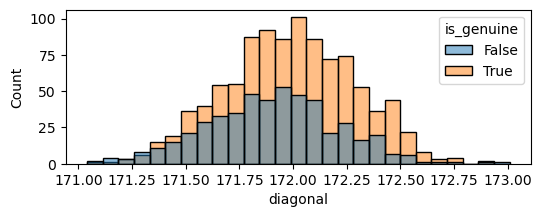

In [15]:
plt.figure(figsize=(6,2))
sns.histplot(data=data, x='diagonal', hue='is_genuine')
plt.show()

Insights:-
* Both fake and genuine bills overlap a lot 
* Most diagonals are between 171.5 and 172.5 mm
* Genuine bills are more concentrated in the middle
* Fake notes are less precise — some slightly shorter, some slightly longer

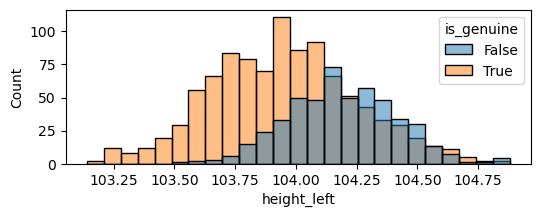

In [16]:
plt.figure(figsize=(6,2))
sns.histplot(data=data, x='height_left', hue='is_genuine')
plt.show()

Insights:-
* Genuine bills have a fairly tight and consistent height.
* Fake bills appear more often at larger heights than genuine ones

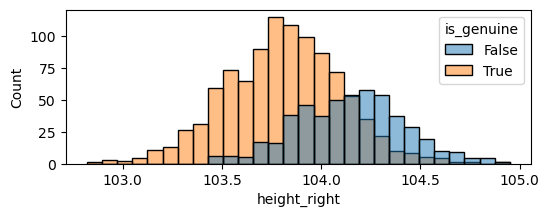

In [17]:
plt.figure(figsize=(6,2))
sns.histplot(data=data, x='height_right', hue='is_genuine')
plt.show()

Insights:-
* Fake bills tend to be slightly taller (on the right side) compared to genuine ones.

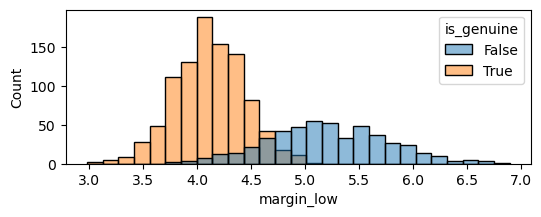

In [18]:
plt.figure(figsize=(6,2))
sns.histplot(data=data, x='margin_low', hue='is_genuine')
plt.show()

Insights:-
* Genuine bills have smaller, consistent margins, while fake bills usually have larger ones.
* There’s only a small overlap near 4.5, so this feature is a strong indicator for distinguishing genuine vs fake bills.

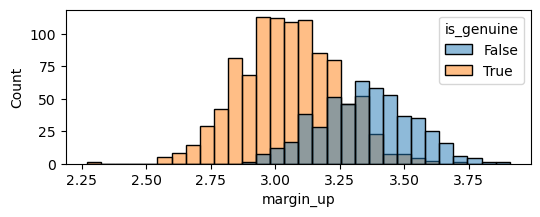

In [19]:
plt.figure(figsize=(6,2))
sns.histplot(data=data, x='margin_up', hue='is_genuine')
plt.show()

Insights:-
* Genuine bills tend to have slightly smaller upper margins than fake ones, but the separation is weaker compared to margin_low

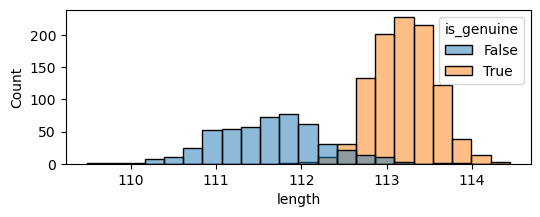

In [20]:
plt.figure(figsize=(6,2))
sns.histplot(data=data, x='length', hue='is_genuine')
plt.show()

Insights:-
* Bill length is a highly reliable feature — genuine bills are longer (~113 mm), while fake bills are shorter (~111–112 mm)

### c) Multivariate Analysis-

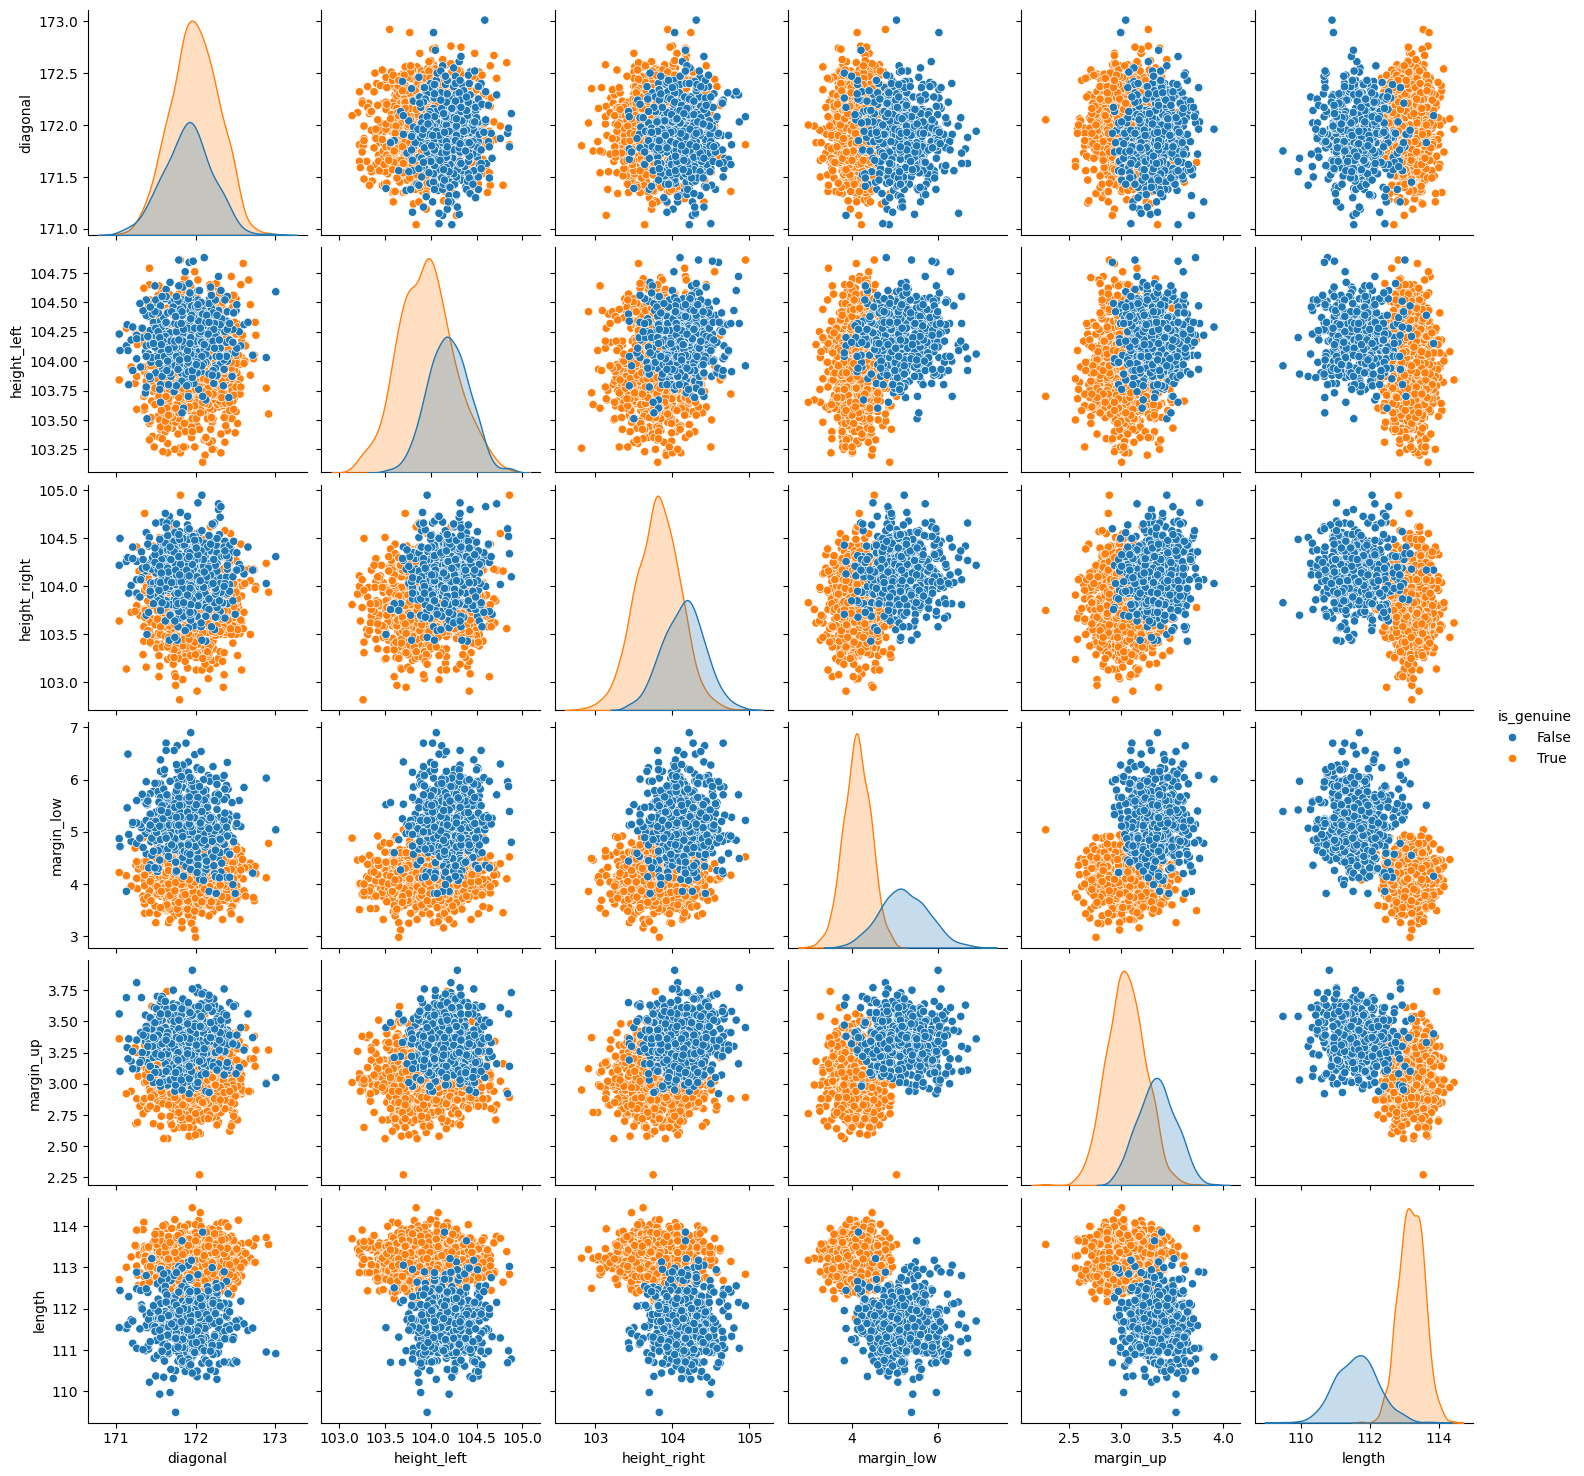

In [21]:
sns.pairplot(data, hue='is_genuine')
plt.show()

# Data Preprocessing

In [22]:
# 1) check for missing values and handle them
data.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [23]:
data['margin_low'] = data['margin_low'].fillna(data['margin_low'].median())

In [24]:
data.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [25]:
# 2) check for duplicate values
data.duplicated().sum()

0

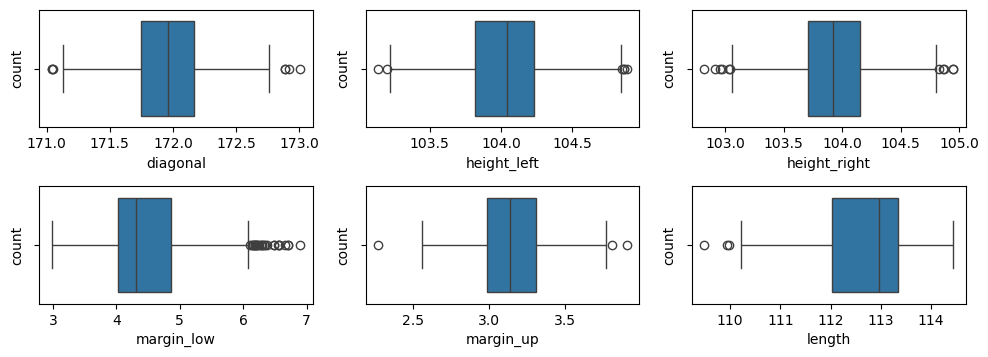

In [26]:
# 3) check for outliers
plt.figure(figsize=(10,5), facecolor='white')
plotnumber = 1

for column in data.drop('is_genuine', axis=1):
    if plotnumber < 7:
        ax = plt.subplot(3,3, plotnumber)
        sns.boxplot(x=data[column])

        plt.xlabel(column, fontsize=10)
        plt.ylabel("count", fontsize=10)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [27]:
# (a) Handle Outliers in diagonal
lower_limit = data['diagonal'].mean() - 3 * data['diagonal'].std()
print("Lower Limit: ", lower_limit)
upper_limit = data['diagonal'].mean() + 3 * data['diagonal'].std()
print("Upper Limit: ", upper_limit)

Lower Limit:  171.04285463425052
Upper Limit:  172.87402536574953


In [28]:
# Find values above Upper Limit
data.loc[data['diagonal'] > upper_limit]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
828,True,172.92,103.55,103.94,4.78,3.27,113.55
842,True,172.89,103.77,104.24,4.12,3.01,113.72
1022,False,172.89,104.03,104.03,6.03,3.00,110.95
1277,False,173.01,104.59,104.31,5.04,3.05,110.91


In [29]:
len(data.loc[data['diagonal'] > upper_limit])/len(data)

0.0026666666666666666

less than 5%

In [30]:
# Find values below lower limit
data.loc[data['diagonal'] < lower_limit]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
729,True,171.04,103.84,103.64,4.22,3.36,112.70
1142,False,171.04,104.23,104.22,4.87,3.56,111.54


In [31]:
len(data.loc[data['diagonal'] < lower_limit])/len(data)

0.0013333333333333333

less than 5%

In [32]:
# Replace Outliers with mean since data is normal
data.loc[data['diagonal'] > upper_limit, "diagonal"] = data['diagonal'].mean()
data.loc[data['diagonal'] < lower_limit, "diagonal"] = data['diagonal'].mean()

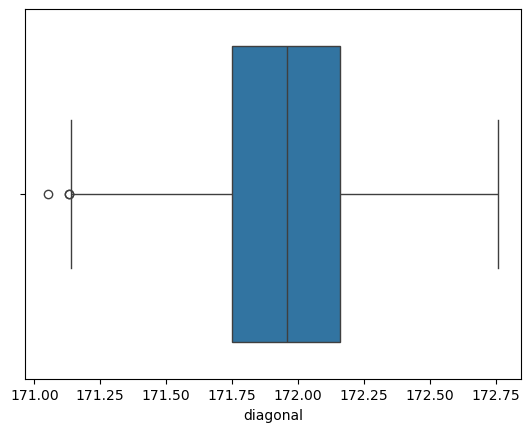

In [33]:
sns.boxplot(x=data.diagonal)
plt.show()

In [34]:
# (b) Handle Outliers in height_left
lower_limit = data['height_left'].mean() - 3 * data['height_left'].std()
print("Lower Limit: ", lower_limit)
upper_limit = data['height_left'].mean() + 3 * data['height_left'].std()
print("Upper Limit: ", upper_limit)

print(data.loc[data['height_left'] > upper_limit])
print(len(data.loc[data['height_left'] > upper_limit])/len(data))

print(data.loc[data['height_left'] < lower_limit])
print(len(data.loc[data['height_left'] < lower_limit])/len(data))

Lower Limit:  103.13114828013923
Upper Limit:  104.92791838652741
Empty DataFrame
Columns: [is_genuine, diagonal, height_left, height_right, margin_low, margin_up, length]
Index: []
0.0
Empty DataFrame
Columns: [is_genuine, diagonal, height_left, height_right, margin_low, margin_up, length]
Index: []
0.0


In [35]:
# (c) Handle Outliers in height_right
lower_limit = data['height_right'].mean() - 3 * data['height_right'].std()
print("Lower Limit: ", lower_limit)
upper_limit = data['height_right'].mean() + 3 * data['height_right'].std()
print("Upper Limit: ", upper_limit)

print(data.loc[data['height_right'] > upper_limit])
print(len(data.loc[data['height_right'] > upper_limit])/len(data))

print(data.loc[data['height_right'] < lower_limit])
print(len(data.loc[data['height_right'] < lower_limit])/len(data))

Lower Limit:  102.94342542947983
Upper Limit:  104.89718790385352
      is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1484       False    172.08       103.96        104.95        5.22       3.45   

      length  
0     112.83  
1484  112.07  
0.0013333333333333333
     is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
251        True    171.80       103.26        102.82        4.31       2.95   
522        True    172.02       104.42        102.91        3.86       3.12   

     length  
251  113.22  
522  113.43  
0.0013333333333333333


less than 5%

In [36]:
# Replace Outliers with mean since data is normal
data.loc[data['height_right'] > upper_limit, "height_right"] = data['height_right'].mean()
data.loc[data['height_right'] < lower_limit, "height_right"] = data['height_right'].mean()

In [37]:
# (d) Handle Outliers in margin_low
# Find Q1, Q3 of margin_low

Q1 = data['margin_low'].quantile(0.25) # 1/4th value
print("Lower Quartile: ", Q1)
Q3 = data['margin_low'].quantile(0.75) # 3/4th value
print("Upper Quartile: ", Q3)

Lower Quartile:  4.03
Upper Quartile:  4.86


In [38]:
# Find IQR
IQR = Q3-Q1
IQR

0.8300000000000001

In [39]:
lower_limit = Q1-1.5*IQR
print("Lower Limit: ", lower_limit)
upper_limit = Q3+1.5*IQR
print("Upper Limit: ", upper_limit)

Lower Limit:  2.785
Upper Limit:  6.105


In [40]:
# Find values above Upper Limit
data.loc[data['margin_low'] > upper_limit]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1023,False,172.02,104.26,104.20,6.20,3.58,111.25
1027,False,171.63,104.02,104.66,6.70,3.28,111.28
1031,False,172.40,104.00,103.82,6.33,3.10,112.11
1041,False,171.77,104.12,104.42,6.65,3.63,111.53
1053,False,171.85,104.52,104.05,6.21,3.43,111.96
1075,False,172.02,104.51,103.69,6.23,3.39,112.35
1092,False,171.87,104.76,104.02,6.30,3.61,111.29
1110,False,171.73,104.32,104.07,6.56,3.30,112.80
1124,False,171.88,103.92,104.27,6.70,3.11,110.93
1133,False,171.79,103.99,103.67,6.16,3.52,110.93


In [41]:
len(data.loc[data['margin_low'] > upper_limit])/len(data)

0.017333333333333333

less than 5%

In [42]:
# Find values below lower limit
data.loc[data['margin_low'] < lower_limit]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length


In [43]:
data.loc[data['margin_low'] > upper_limit, "margin_low"] = data['margin_low'].median()

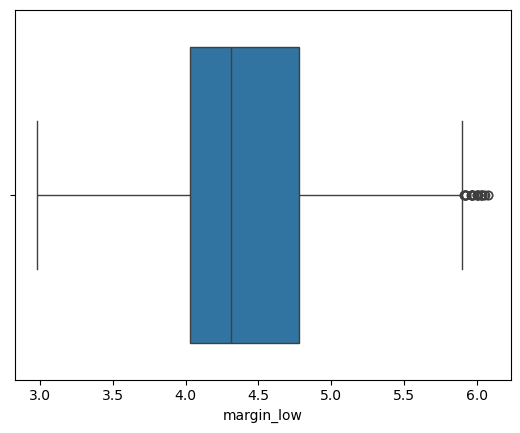

In [44]:
sns.boxplot(x=data.margin_low)
plt.show()

In [45]:
# (e) Handle Outliers in margin_up
lower_limit = data['margin_up'].mean() - 3 * data['margin_up'].std()
print("Lower Limit: ", lower_limit)
upper_limit = data['margin_up'].mean() + 3 * data['margin_up'].std()
print("Upper Limit: ", upper_limit)

print(data.loc[data['margin_up'] > upper_limit])
print(len(data.loc[data['margin_up'] > upper_limit])/len(data))

print(data.loc[data['margin_up'] < lower_limit])
print(len(data.loc[data['margin_up'] < lower_limit])/len(data))

Lower Limit:  2.4560339847737227
Upper Limit:  3.8469126818929444
      is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
1029       False    171.96       104.29        104.03        6.01       3.91   

      length  
1029  110.83  
0.0006666666666666666
     is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
664        True    172.05        103.7        103.75        5.04       2.27   

     length  
664  113.55  
0.0006666666666666666


less than 5%

In [46]:
# Replace Outliers with mean since data is normal
data.loc[data['margin_up'] > upper_limit, "margin_up"] = data['margin_up'].mean()
data.loc[data['margin_up'] < lower_limit, "margin_up"] = data['margin_up'].mean()

In [47]:
# (f) Handle Outliers in length
# Find Q1, Q3 of length

Q1 = data['length'].quantile(0.25)
Q3 = data['length'].quantile(0.75)

# Find IQR
IQR = Q3-Q1
IQR

lower_limit = Q1-1.5*IQR
print("Lower Limit: ", lower_limit)
upper_limit = Q3+1.5*IQR
print("Upper Limit: ", upper_limit)

print(data.loc[data['length'] > upper_limit])
print(len(data.loc[data['length'] > upper_limit])/len(data))

print(data.loc[data['length'] < lower_limit])
print(len(data.loc[data['length'] < lower_limit])/len(data))

Lower Limit:  110.065
Upper Limit:  115.305
Empty DataFrame
Columns: [is_genuine, diagonal, height_left, height_right, margin_low, margin_up, length]
Index: []
0.0
      is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
1082       False    171.75       103.96        103.83        5.39       3.54   
1355       False    171.68       103.89        103.70        5.97       3.03   
1453       False    171.55       104.20        104.49        5.42       3.54   

      length  
1082  109.49  
1355  109.97  
1453  109.93  
0.002


less than 5% in lower limit

In [48]:
data.loc[data['length'] < lower_limit, "length"] = data['length'].median()

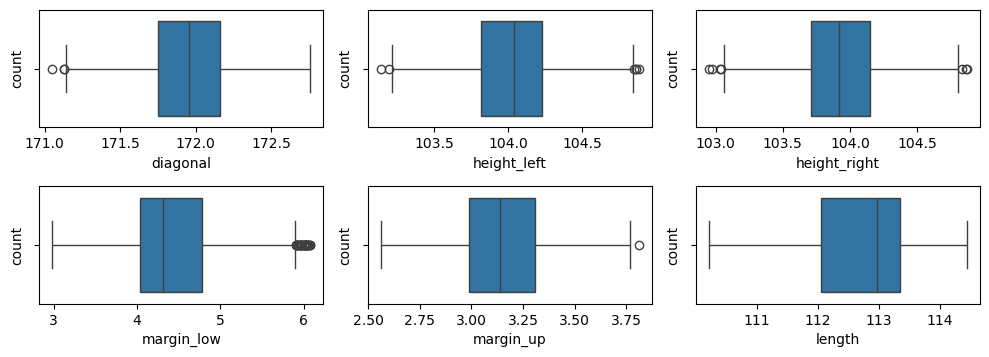

In [49]:
plt.figure(figsize=(10,5), facecolor='white')
plotnumber = 1

for column in data.drop('is_genuine', axis=1):
    if plotnumber < 7:
        ax = plt.subplot(3,3, plotnumber)
        sns.boxplot(x=data[column])

        plt.xlabel(column, fontsize=10)
        plt.ylabel("count", fontsize=10)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [50]:
# 4) Scaling Data / Normalization / Standardization
data.head(5)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,103.920307,4.52,2.89,112.83
1,True,171.46,103.36,103.660000,3.77,2.99,113.09
2,True,172.69,104.48,103.500000,4.40,2.94,113.16
3,True,171.36,103.91,103.940000,3.62,3.01,113.51
4,True,171.73,104.28,103.460000,4.04,3.48,112.54


In [51]:
data.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
df = data['is_genuine']
dt = scaling.fit_transform(data.drop('is_genuine', axis=1))

In [53]:
dt

array([[0.44444444, 0.98850575, 0.50536806, 0.49677419, 0.264     ,
        0.61848341],
       [0.23976608, 0.12643678, 0.36979167, 0.25483871, 0.344     ,
        0.68009479],
       [0.95906433, 0.77011494, 0.28645833, 0.45806452, 0.304     ,
        0.69668246],
       ...,
       [0.43859649, 0.5       , 0.609375  , 0.81612903, 0.64      ,
        0.40995261],
       [0.59064327, 0.65517241, 0.578125  , 0.70645161, 0.72      ,
        0.48104265],
       [0.24561404, 0.58045977, 0.453125  , 0.53225806, 0.648     ,
        0.43838863]])

convert this array into a dataframe

In [54]:
data_scaled = pd.DataFrame(dt, 
columns=['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length'])

data_scaled

,diagonal,height_left,height_right,margin_low,margin_up,length
0,0.444444,0.988506,0.505368,0.496774,0.264,0.618483
1,0.239766,0.126437,0.369792,0.254839,0.344,0.680095
2,0.959064,0.770115,0.286458,0.458065,0.304,0.696682
3,0.181287,0.442529,0.515625,0.206452,0.360,0.779621
4,0.397661,0.655172,0.265625,0.341935,0.736,0.549763
...,...,...,...,...,...,...
1495,0.409357,0.712644,0.635417,0.464516,0.424,0.251185
1496,0.666667,0.856322,0.776042,0.738710,0.648,0.177725
1497,0.438596,0.500000,0.609375,0.816129,0.640,0.409953
1498,0.590643,0.655172,0.578125,0.706452,0.720,0.481043


In [55]:
data_processed = pd.concat([data_scaled, df], axis=1)
data_processed

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine
0,0.444444,0.988506,0.505368,0.496774,0.264,0.618483,True
1,0.239766,0.126437,0.369792,0.254839,0.344,0.680095,True
2,0.959064,0.770115,0.286458,0.458065,0.304,0.696682,True
3,0.181287,0.442529,0.515625,0.206452,0.360,0.779621,True
4,0.397661,0.655172,0.265625,0.341935,0.736,0.549763,True
...,...,...,...,...,...,...,...
1495,0.409357,0.712644,0.635417,0.464516,0.424,0.251185,False
1496,0.666667,0.856322,0.776042,0.738710,0.648,0.177725,False
1497,0.438596,0.500000,0.609375,0.816129,0.640,0.409953,False
1498,0.590643,0.655172,0.578125,0.706452,0.720,0.481043,False


In [56]:
data_processed.to_csv('processed_fake_bills_dataset.csv', index=False)

In [57]:
# 5) Converting categorical data into numerical data
data_processed['is_genuine'] = data_processed['is_genuine'].astype(int)
data_processed

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine
0,0.444444,0.988506,0.505368,0.496774,0.264,0.618483,1
1,0.239766,0.126437,0.369792,0.254839,0.344,0.680095,1
2,0.959064,0.770115,0.286458,0.458065,0.304,0.696682,1
3,0.181287,0.442529,0.515625,0.206452,0.360,0.779621,1
4,0.397661,0.655172,0.265625,0.341935,0.736,0.549763,1
...,...,...,...,...,...,...,...
1495,0.409357,0.712644,0.635417,0.464516,0.424,0.251185,0
1496,0.666667,0.856322,0.776042,0.738710,0.648,0.177725,0
1497,0.438596,0.500000,0.609375,0.816129,0.640,0.409953,0
1498,0.590643,0.655172,0.578125,0.706452,0.720,0.481043,0


# Feature Engineering/Selection

In [58]:
# 1) Drop the columns which has very less correlation with target variables
data_processed.corr()

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine
diagonal,1.000000,0.020781,-0.031550,-0.102222,-0.048420,0.095121,0.137253
height_left,0.020781,1.000000,0.237097,0.296504,0.243890,-0.324783,-0.379833
height_right,-0.031550,0.237097,1.000000,0.378878,0.309202,-0.405676,-0.487265
margin_low,-0.102222,0.296504,0.378878,1.000000,0.418357,-0.634165,-0.756822
margin_up,-0.048420,0.243890,0.309202,0.418357,1.000000,-0.516253,-0.606497
length,0.095121,-0.324783,-0.405676,-0.634165,-0.516253,1.000000,0.848323
is_genuine,0.137253,-0.379833,-0.487265,-0.756822,-0.606497,0.848323,1.000000


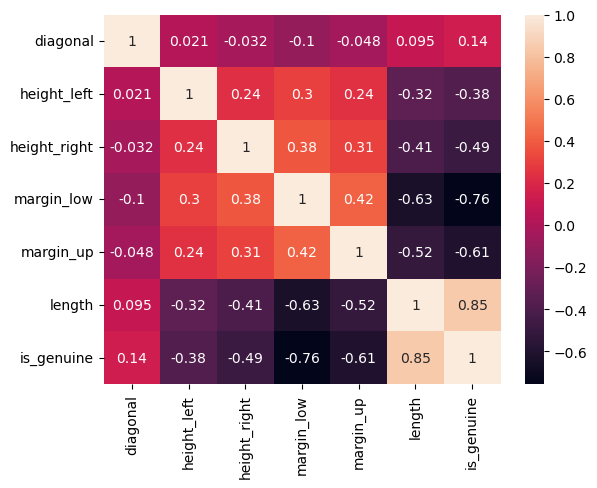

In [59]:
sns.heatmap(data_processed.corr(), annot=True)
plt.show()

* margin_low and margin_up has very less correlation with target variable.
* Since we have small dataset we are not dropping them

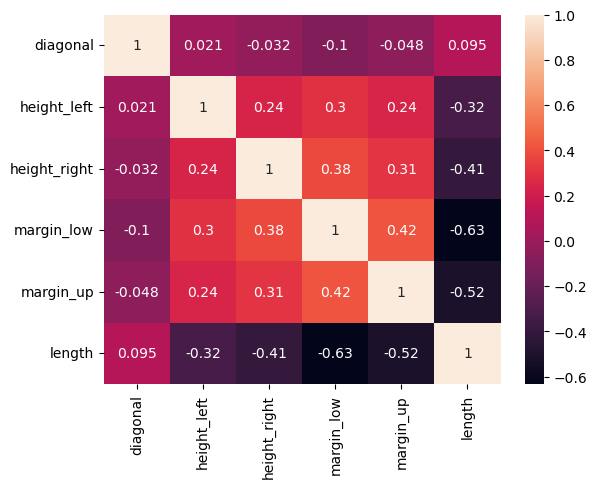

In [60]:
# 2) Drop one of the column if two input variables has high correlation
# Check for multicolliniarity

sns.heatmap(data_processed.drop('is_genuine', axis=1).corr(), annot=True)
plt.show()

There is no multicolliniarity between features

# Split Data into x and y

In [61]:
x = data_processed.drop('is_genuine', axis=1)
y = data_processed.is_genuine

# Split Data for training and testing

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [63]:
x_train.shape

(1050, 6)

In [64]:
x_test.shape

(450, 6)

# Model Building

In [65]:
# 1) Import KNN Classifier Library
from sklearn.neighbors import KNeighborsClassifier

# 2) Initialize model
model = KNeighborsClassifier(n_neighbors=3)

# 3) Train model with x_train and y_train
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [66]:
# 4) make predictions/test model
y_pred = model.predict(x_test)

# Evaluate the Model

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [68]:
confusion_matrix(y_test, y_pred)

array([[155,   6],
       [  1, 288]], dtype=int64)

In [69]:
accuracy_score(y_test, y_pred)

0.9844444444444445

In [70]:
precision_score(y_test, y_pred)

0.9795918367346939

In [71]:
recall_score(y_test, y_pred)

0.9965397923875432

In [72]:
f1_score(y_test, y_pred)

0.9879931389365352

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       161
           1       0.98      1.00      0.99       289

    accuracy                           0.98       450
   macro avg       0.99      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



# Hyperparameter Tuning

In [74]:
error_rate = []

for i in range(2,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [75]:
error_rate

[0.022222222222222223,
 0.015555555555555555,
 0.013333333333333334,
 0.017777777777777778,
 0.011111111111111112,
 0.015555555555555555,
 0.013333333333333334,
 0.015555555555555555,
 0.013333333333333334,
 0.015555555555555555,
 0.015555555555555555,
 0.015555555555555555,
 0.015555555555555555,
 0.015555555555555555,
 0.015555555555555555,
 0.015555555555555555,
 0.015555555555555555,
 0.015555555555555555]

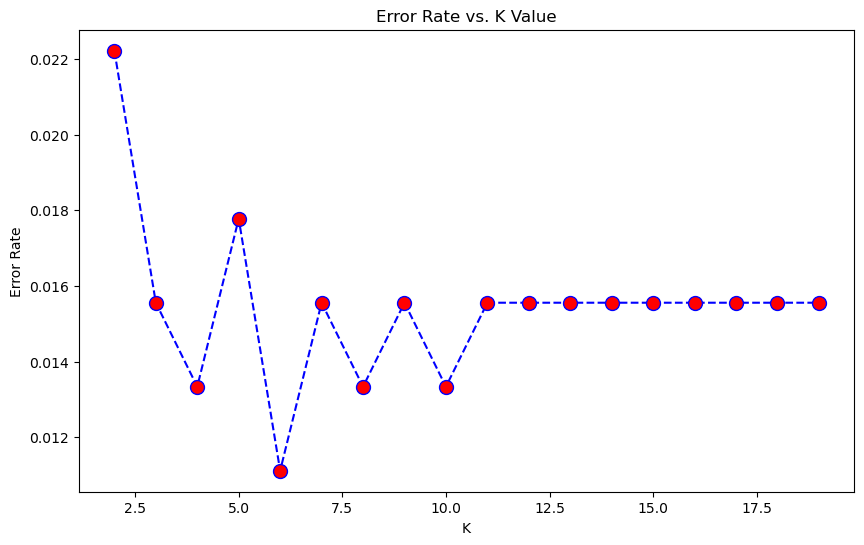

In [76]:
plt.figure(figsize=(10,6))
plt.plot(range(2, 20),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

Here we can see that when k value is 6, the error rate is low.

In [77]:
model2 = KNeighborsClassifier(n_neighbors=6)
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)

In [78]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       161
           1       0.98      1.00      0.99       289

    accuracy                           0.99       450
   macro avg       0.99      0.98      0.99       450
weighted avg       0.99      0.99      0.99       450

